<a href="https://colab.research.google.com/github/Swetha310504/SHEETSCAN-INTELLIGENT-MARK-EXTRACTION-USING-CONVOLUTIONAL-NEURAL-NETWORK/blob/main/SheetScan_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python opencv-python-headless pytesseract

In [ ]:
# Install Tesseract OCR
!sudo apt update
!sudo apt install -y tesseract-ocr

# Install necessary Python libraries
!pip install pytesseract opencv-python pandas openpyxl

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,738 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,513 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports/universe amd

In [ ]:
import cv2
import numpy as np
import pytesseract
from skimage import io

In [ ]:
# Define target dimensions for standardization
TARGET_WIDTH = 1280
TARGET_HEIGHT = 1024

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Rotation Correction using Hough Line Transform
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    angle = 0
    if lines is not None:
        angles = []
        for rho, theta in lines[:, 0]:
            # Calculate angle in degrees
            angles.append((theta - np.pi / 2) * (180 / np.pi))
        # Calculate median angle
        angle = np.median(angles)

    # Rotate to correct tilt
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REPLICATE)

    # Step 2: Resize to Standard Dimensions
    resized = cv2.resize(rotated, (TARGET_WIDTH, TARGET_HEIGHT))

    # Step 3: Adaptive Thresholding for Visibility
    #grayscale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    #thresholded = cv2.adaptiveThreshold(grayscale, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    return resized

# Process a list of images and save the standardized versions
image_paths = ["Paper2.jpeg"]  # Add more paths as needed
for i, path in enumerate(image_paths):
    preprocessed_image = preprocess_image(path)
    cv2.imwrite(f"Standardized_ExamPaper_{i+1}.png", preprocessed_image)


In [ ]:
pip install pytesseract opencv-python pandas openpyxl

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract opencv-python pandas openpyxl

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


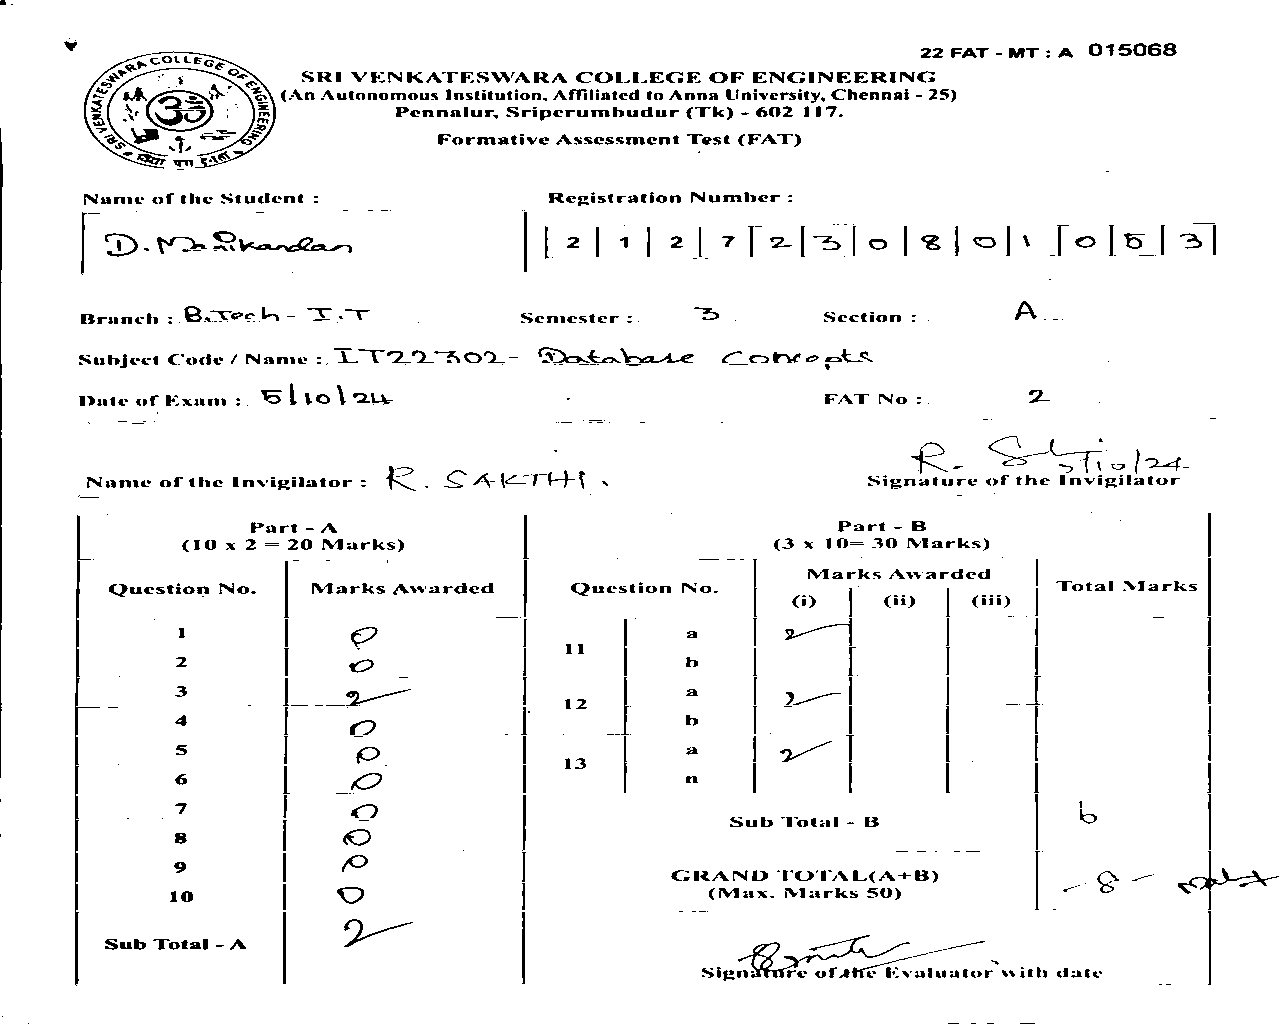

Extraction completed. Saved each number region without extra lines.


In [ ]:
from google.colab.patches import cv2_imshow  # For image display in Colab

# Load the image
image_path = "/content/Standardized_ExamPaper_1.png"  # Ensure the path is correct
img = cv2.imread(image_path)

# Check if the image is loaded properly
if img is None:
    print("Error: Image not loaded. Check the path.")
else:
    # Convert to grayscale for better text detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding to create a high-contrast image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert the image to make the lines white (for easier line detection)
    inverted = cv2.bitwise_not(binary)

    # Detect horizontal lines using morphological operations
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 1))  # Adjusted kernel size to detect lines
    detected_lines = cv2.morphologyEx(inverted, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)

    # Subtract the detected lines from the inverted image
    line_removed = cv2.subtract(inverted, detected_lines)

    # Invert the image back to original color scheme (numbers in black, background in white)
    cleaned_image = cv2.bitwise_not(line_removed)

    # Find contours on the cleaned image to isolate numbers
    contours, _ = cv2.findContours(cleaned_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter and extract only relevant contours (likely containing numbers)
    extracted_numbers = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # Set minimum size to filter small artifacts and unwanted lines
        if h > 10 and w > 2:  # Adjust these values based on your image characteristics
            number_region = cleaned_image[y:y+h, x:x+w]
            extracted_numbers.append(number_region)
            # Optional: Save each extracted number region
            cv2.imwrite(f"extracted_number_{x}_{y}.jpg", number_region)

    # Display the first extracted number region for verification (optional)
    if extracted_numbers:
        cv2_imshow(extracted_numbers[0])

    print("Extraction completed. Saved each number region without extra lines.")


Extracted and saved adjusted question 1 as question_1_clean_adjusted.jpg
Extracted and saved adjusted question 2 as question_2_clean_adjusted.jpg
Extracted and saved adjusted question 3 as question_3_clean_adjusted.jpg
Extracted and saved adjusted question 4 as question_4_clean_adjusted.jpg
Extracted and saved adjusted question 5 as question_5_clean_adjusted.jpg
Extracted and saved adjusted question 6 as question_6_clean_adjusted.jpg
Extracted and saved adjusted question 7 as question_7_clean_adjusted.jpg
Extracted and saved adjusted question 8 as question_8_clean_adjusted.jpg
Extracted and saved adjusted question 9 as question_9_clean_adjusted.jpg
Extracted and saved adjusted question 10 as question_10_clean_adjusted.jpg
Extracted and saved adjusted question 11 as question_11_clean_adjusted.jpg
Extracted and saved adjusted question 12 as question_12_clean_adjusted.jpg
Extracted and saved adjusted question 13 as question_13_clean_adjusted.jpg
Extracted and saved adjusted roll digit 1 a

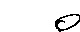

In [ ]:
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow  # For image display in Colab

# Load the image
image_path = "/content/extracted_number_0_0.jpg"  # Ensure the path is correct
img = cv2.imread(image_path)

# Check if the image is loaded properly
if img is None:
    print("Error: Image not loaded. Check the path.")  # Added a print statement to check if image loading fails
else:
    # Adjusted function to extract region with reduced space and upward shift
    def extract_region_adjusted(image, start_coords, width, height, upward_shift=7, height_reduction=10):
        """
        Extracts a region from the image with reduced space and slight upward shift.

        Parameters:
        - start_coords (tuple): Starting (x, y) coordinates.
        - width (int): Width of the region.
        - height (int): Original height of the region.
        - upward_shift (int): Amount to shift the region upwards.
        - height_reduction (int): Amount to reduce the region height.

        Returns:
        - Cropped region from the image.
        """
        x1, y1 = start_coords
        x2, y2 = x1 + width, y1 + height - height_reduction
        y1 = max(0, y1 - upward_shift)  # Shift upwards, ensuring it doesn't go out of bounds
        return image[y1:y2, x1:x2]

    # Sizes and locations for each region
    # Questions 1 to 10
    question_size_1_10 = (80, 35)  # Width x Height for questions 1-10
    question_locations_1_10 = [
        (296, 620), (296, 653), (296, 678), (296, 709),
        (296, 739), (296, 767), (296, 796), (296, 822),
        (296, 853), (296, 885)
    ]

    # Questions 11 to 13
    question_size_11_13 = (40, 61)  # Adjusted width and height for questions 11-13
    question_locations_11_13 = [
        (761, 620), (774, 686), (761, 740)
    ]

    # Roll number digits (reg1, reg2, reg3)
    roll_size = (35, 45)  # Adjusted width and height for roll number regions
    roll_locations = [
        (1068, 228), (1116, 227), (1169, 228)
    ]

    # Total marks
    total_size = (50, 50)  # Adjusted width and height for total marks region
    total_location = (1083, 857)

    # Process questions 1 to 10 with reduced space and upward shift
    question_images = {}
    for q_num, loc in enumerate(question_locations_1_10, start=1):
        question_image = extract_region_adjusted(img, loc, question_size_1_10[0], question_size_1_10[1])
        question_images[f"question_{q_num}"] = question_image
        cv2.imwrite(f"question_{q_num}.jpg", question_image)  # Save each adjusted question image
        print(f"Extracted and saved adjusted question {q_num} as question_{q_num}_clean_adjusted.jpg")

    # Process questions 11 to 13 with reduced space and upward shift
    for q_num, loc in enumerate(question_locations_11_13, start=11):
        question_image = extract_region_adjusted(img, loc, question_size_11_13[0], question_size_11_13[1])
        question_images[f"question_{q_num}"] = question_image
        cv2.imwrite(f"question_{q_num}.jpg", question_image)  # Save each adjusted question image
        print(f"Extracted and saved adjusted question {q_num} as question_{q_num}_clean_adjusted.jpg")

    # Process roll number digits (reg1, reg2, reg3) with reduced space and upward shift
    for r_num, loc in enumerate(roll_locations, start=1):
        roll_image = extract_region_adjusted(img, loc, roll_size[0], roll_size[1])
        question_images[f"reg{r_num}"] = roll_image
        cv2.imwrite(f"reg{r_num}.jpg", roll_image)  # Save each adjusted roll image
        print(f"Extracted and saved adjusted roll digit {r_num} as reg{r_num}_clean_adjusted.jpg")

    # Process total marks with reduced space and upward shift
    total_image = extract_region_adjusted(img, total_location, total_size[0], total_size[1])
    cv2.imwrite("total_clean_adjusted.jpg", total_image)
    print("Extracted and saved adjusted total marks as total_clean_adjusted.jpg")

    # Display one of the adjusted extracted images for verification (optional)
    try:
        if question_images.get("question_1") is not None:
            cv2_imshow(question_images["question_1"])
    except NameError:
        pass


In [ ]:
!pip install opencv-python
!pip install tensorflow

In [ ]:

import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/my_model.keras')

# Verify the model architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 32 variables whereas the saved optimizer has 62 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 1, 1, 128)           │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 1, 1, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │              

 Total params: 653,654 (2.49 MB)

 Trainable params: 326,410 (1.25 MB)

 Non-trainable params: 832 (3.25 KB)

 Optimizer params: 326,412 (1.25 MB)

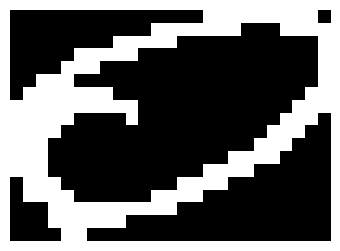

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a multi-digit image (replace with your image path)
image = cv2.imread('/content/question_1.jpg')

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding (invert to match MNIST format: white digits on black background)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Apply dilation to thicken the digits
kernel = np.ones((2, 2), np.uint8)  # Adjust the kernel size to control thickness
thresh_dilated = cv2.dilate(thresh, kernel, iterations=1)

# Find contours of the digits
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop over the contours to extract individual digits
digits = []
bounding_boxes = []

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if h > 5 and w > 2:  # Adjust filtering based on size
        digit = thresh[y:y+h, x:x+w]
        digits.append(digit)
        bounding_boxes.append((x, y, w, h))

# Sort digits based on x-coordinate (left to right)
digits_sorted = [x for _, x in sorted(zip(bounding_boxes, digits), key=lambda pair: pair[0])]

# Display the segmented digits
plt.figure(figsize=(10, 3))
for i, digit in enumerate(digits_sorted):
    plt.subplot(1, len(digits_sorted), i+1)
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


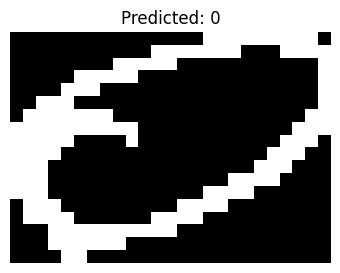

In [ ]:
def preprocess_digit(digit):
    # Resize to 28x28 (matching the input size of the MNIST-trained model)
    resized_digit = cv2.resize(digit, (28, 28))

    # Normalize pixel values to the range [0, 1]
    normalized_digit = resized_digit / 255.0

    # Reshape to (28, 28, 1) to match the CNN input shape for grayscale images
    reshaped_digit = normalized_digit.reshape(28, 28, 1)  # Corrected shape

    return reshaped_digit

# Preprocess each digit and prepare for prediction
processed_digits = np.array([preprocess_digit(digit) for digit in digits_sorted])

# Predict each digit and display results
plt.figure(figsize=(10, 3))
for i, digit in enumerate(processed_digits):
    # CNN expects input shape (batch_size, 28, 28, 1)
    prediction = model.predict(np.expand_dims(digit, axis=0))

    # Get the predicted digit (the class with the highest probability)
    predicted_digit = np.argmax(prediction)

    # Display the digit and the prediction
    plt.subplot(1, len(processed_digits), i+1)
    plt.imshow(digits_sorted[i], cmap='gray')  # Display the original segmented digit
    plt.title(f"Predicted: {predicted_digit}")
    plt.axis('off')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


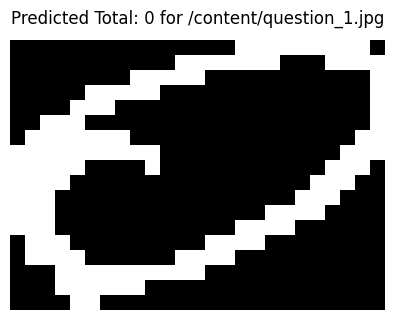

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


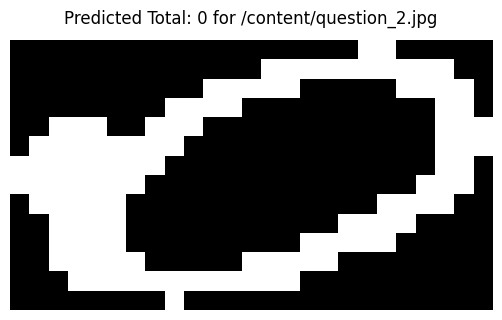

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


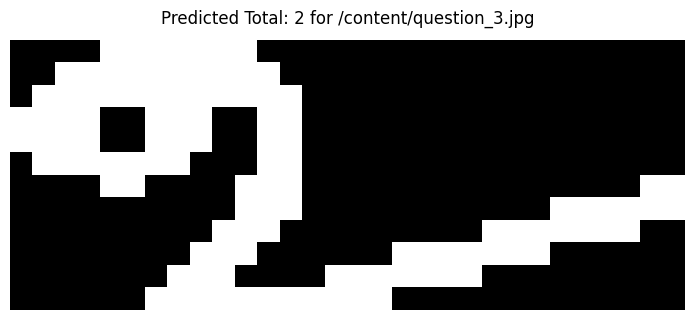

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


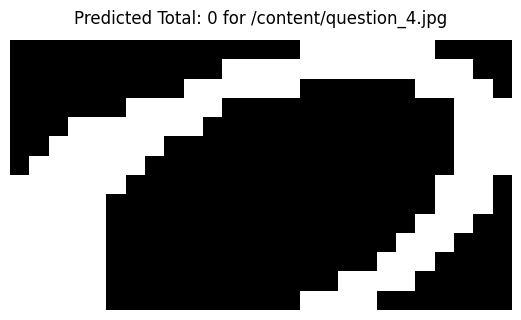

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


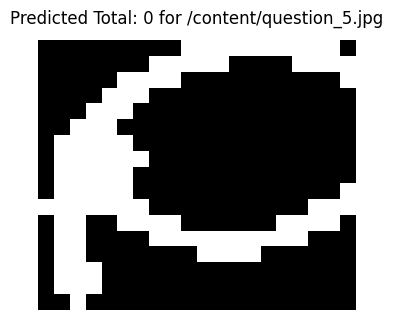

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


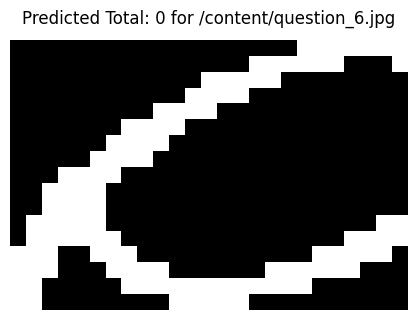

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


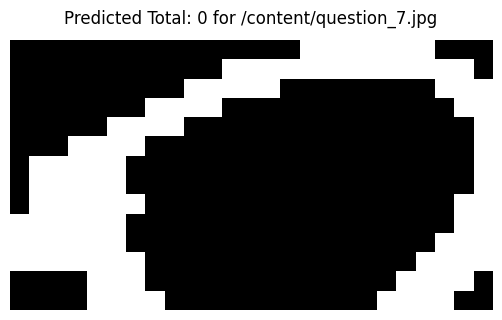

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


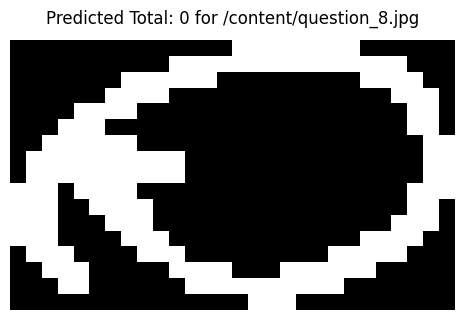

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


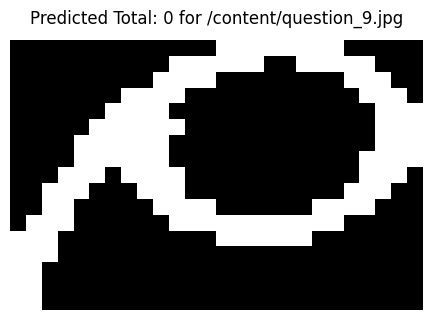

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


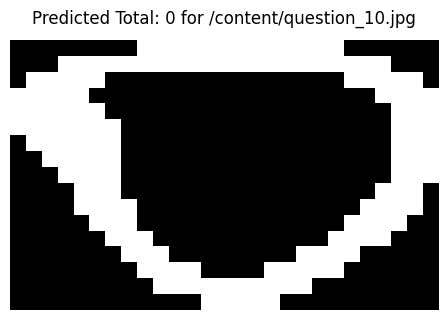

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


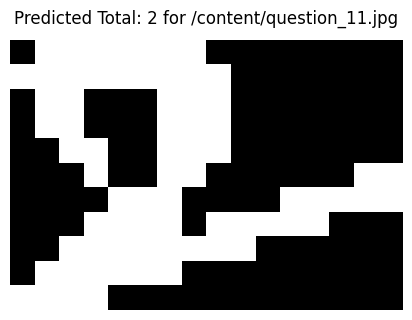

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


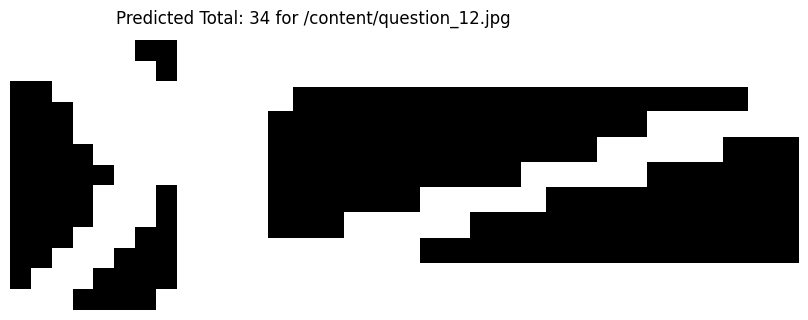

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


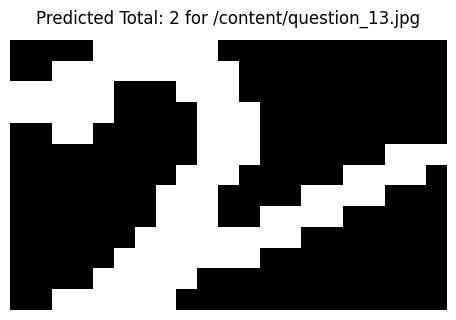

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


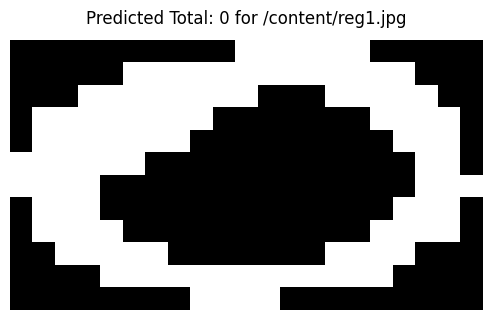

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


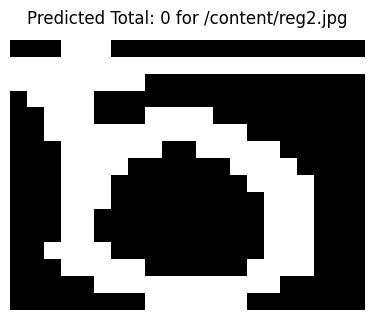

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


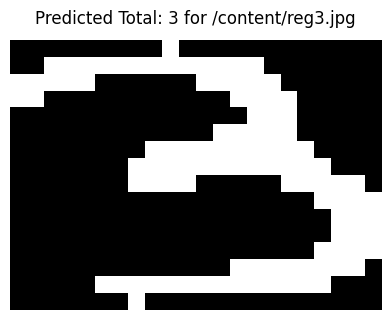

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


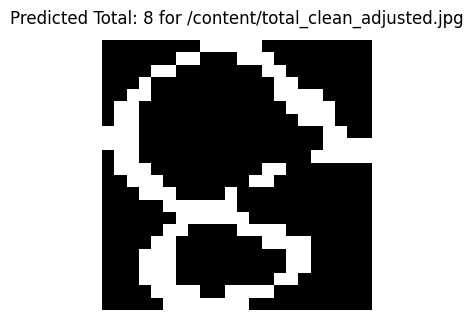

Predicted total for /content/question_1.jpg: 0
Predicted total for /content/question_2.jpg: 0
Predicted total for /content/question_3.jpg: 2
Predicted total for /content/question_4.jpg: 0
Predicted total for /content/question_5.jpg: 0
Predicted total for /content/question_6.jpg: 0
Predicted total for /content/question_7.jpg: 0
Predicted total for /content/question_8.jpg: 0
Predicted total for /content/question_9.jpg: 0
Predicted total for /content/question_10.jpg: 0
Predicted total for /content/question_11.jpg: 2
Predicted total for /content/question_12.jpg: 34
Predicted total for /content/question_13.jpg: 2
Predicted total for /content/reg1.jpg: 0
Predicted total for /content/reg2.jpg: 0
Predicted total for /content/reg3.jpg: 3
Predicted total for /content/total_clean_adjusted.jpg: 8


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image paths
image_files = [
    '/content/question_1.jpg',
    '/content/question_2.jpg',
    '/content/question_3.jpg',
    '/content/question_4.jpg',
    '/content/question_5.jpg',
    '/content/question_6.jpg',
    '/content/question_7.jpg',
    '/content/question_8.jpg',
    '/content/question_9.jpg',
    '/content/question_10.jpg',
    '/content/question_11.jpg',
    '/content/question_12.jpg',
    '/content/question_13.jpg',
    '/content/reg1.jpg',
    '/content/reg2.jpg',
    '/content/reg3.jpg',
    '/content/total_clean_adjusted.jpg'
]

# Function to process and predict digits from a single image
def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding (invert to match MNIST format: white digits on black background)
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # Apply dilation to thicken the digits
    kernel = np.ones((2, 2), np.uint8)  # Adjust the kernel size to control thickness
    thresh_dilated = cv2.dilate(thresh, kernel, iterations=1)

    # Find contours of the digits
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop over the contours to extract individual digits
    digits = []
    bounding_boxes = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if h > 5 and w > 2:  # Adjust filtering based on size
            digit = thresh[y:y+h, x:x+w]
            digits.append(digit)
            bounding_boxes.append((x, y, w, h))

    # Sort digits based on x-coordinate (left to right)
    digits_sorted = [x for _, x in sorted(zip(bounding_boxes, digits), key=lambda pair: pair[0])]

    # Preprocess each digit for prediction
    processed_digits = np.array([preprocess_digit(digit) for digit in digits_sorted])

    # Predict each digit using the model
    predictions = []
    for digit in processed_digits:
        prediction = model.predict(np.expand_dims(digit, axis=0))  # Model expects input shape (batch_size, 28, 28, 1)
        predicted_digit = np.argmax(prediction)
        predictions.append(predicted_digit)

    # Combine digits into a single number (concatenate them)
    combined_number = ''.join(map(str, predictions))  # Convert each digit to string and concatenate

    return combined_number, digits_sorted

# Loop through all images, process them, and get predictions
all_predictions = {}
for image_file in image_files:
    combined_number, digits_sorted = process_image(image_file)
    all_predictions[image_file] = combined_number

    # Display the segmented digits and predictions for each image
    plt.figure(figsize=(10, 3))
    for i, digit in enumerate(digits_sorted):
        plt.subplot(1, len(digits_sorted), i+1)
        plt.imshow(digit, cmap='gray')  # Display the original segmented digit
        plt.axis('off')

    # Adjust the layout to prevent overlapping titles
    plt.tight_layout()  # Automatically adjust subplots to fit within the figure
    plt.suptitle(f"Predicted Total: {combined_number} for {image_file}", y=1.05)  # Show the combined total
    plt.show()

# Print all combined predictions
for image_file, combined_number in all_predictions.items():
    print(f"Predicted total for {image_file}: {combined_number}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


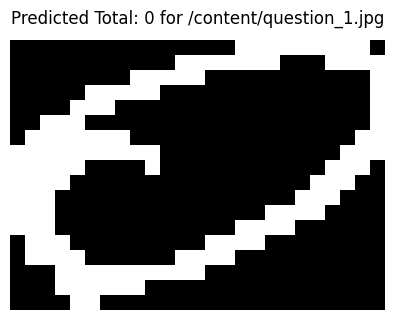

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


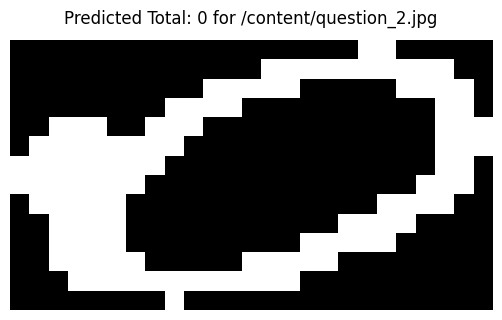

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


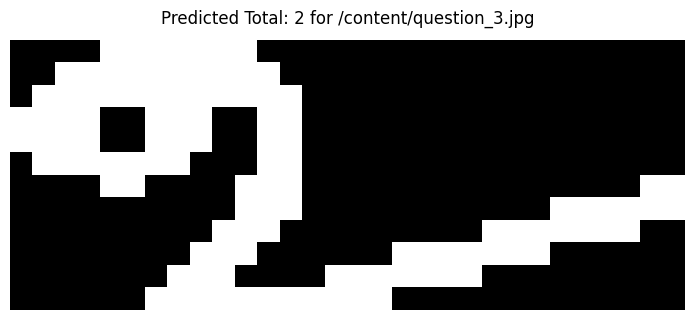

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


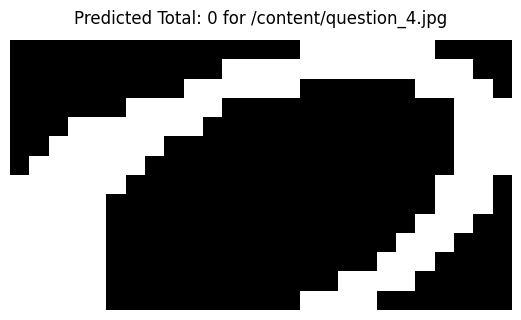

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


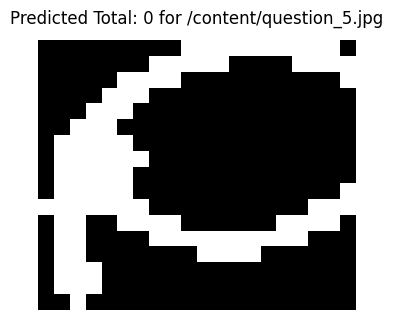

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


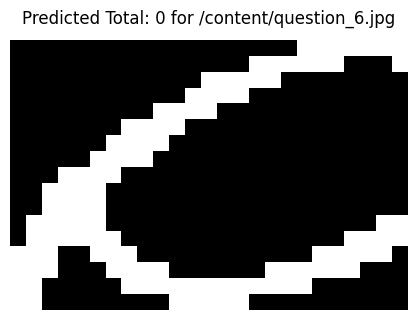

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


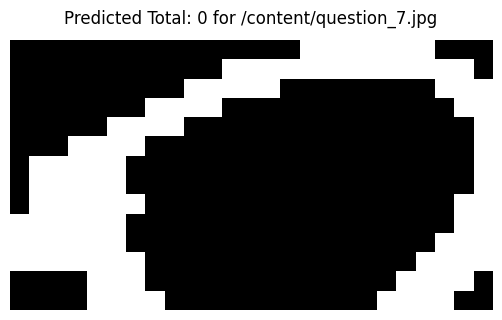

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


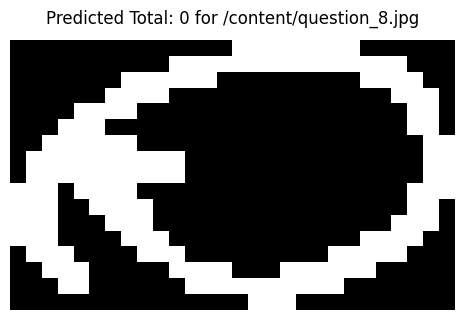

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


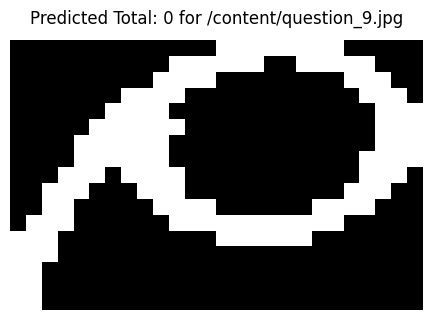

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


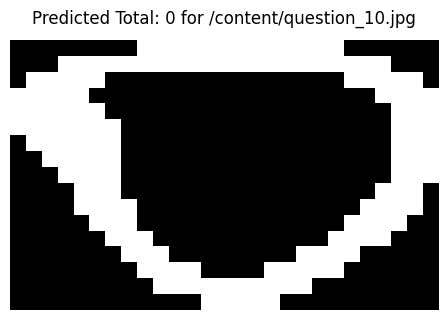

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


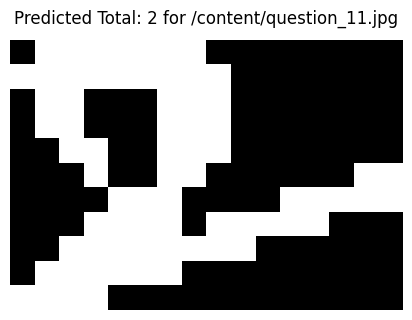

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


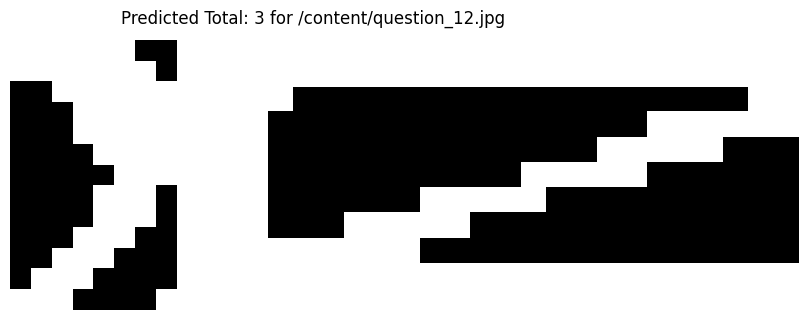

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


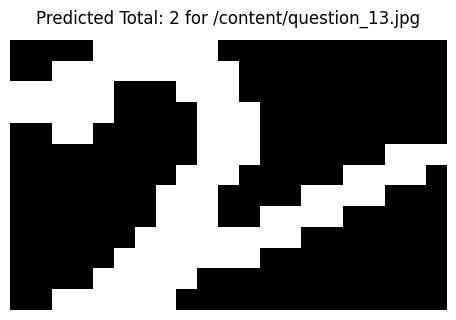

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


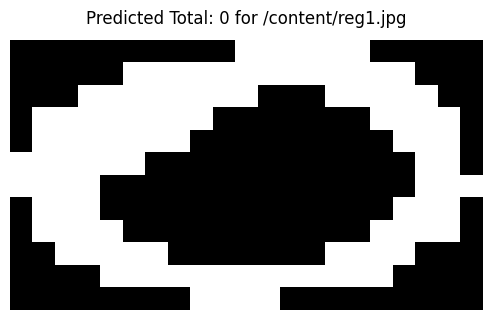

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


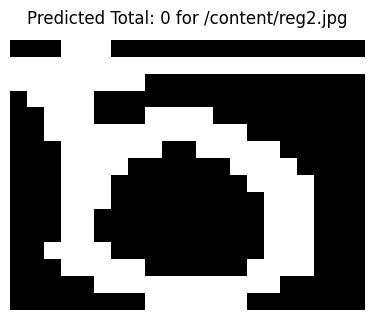

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


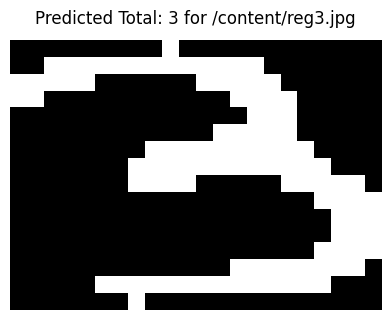

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


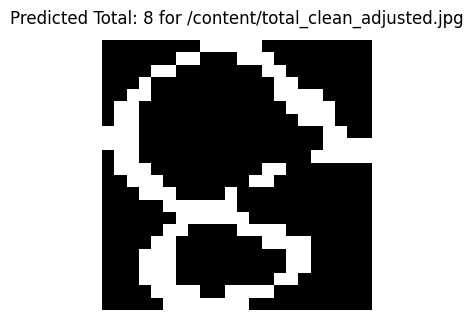

Predicted total for /content/question_1.jpg: 0
Predicted total for /content/question_2.jpg: 0
Predicted total for /content/question_3.jpg: 2
Predicted total for /content/question_4.jpg: 0
Predicted total for /content/question_5.jpg: 0
Predicted total for /content/question_6.jpg: 0
Predicted total for /content/question_7.jpg: 0
Predicted total for /content/question_8.jpg: 0
Predicted total for /content/question_9.jpg: 0
Predicted total for /content/question_10.jpg: 0
Predicted total for /content/question_11.jpg: 2
Predicted total for /content/question_12.jpg: 3
Predicted total for /content/question_13.jpg: 2
Predicted total for /content/reg1.jpg: 0
Predicted total for /content/reg2.jpg: 0
Predicted total for /content/reg3.jpg: 3
Predicted total for /content/total_clean_adjusted.jpg: 8


In [ ]:
# Function to process and predict digits from a single image
def process_image(image_path, question_number=None):
    # Load the image
    image = cv2.imread(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding (invert to match MNIST format: white digits on black background)
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # Apply dilation to thicken the digits
    kernel = np.ones((2, 2), np.uint8)  # Adjust the kernel size to control thickness
    thresh_dilated = cv2.dilate(thresh, kernel, iterations=1)

    # Find contours of the digits
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop over the contours to extract individual digits
    digits = []
    bounding_boxes = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if h > 5 and w > 2:  # Adjust filtering based on size
            digit = thresh[y:y+h, x:x+w]
            digits.append(digit)
            bounding_boxes.append((x, y, w, h))

    # Sort digits based on x-coordinate (left to right)
    digits_sorted = [x for _, x in sorted(zip(bounding_boxes, digits), key=lambda pair: pair[0])]

    # Preprocess each digit for prediction
    processed_digits = np.array([preprocess_digit(digit) for digit in digits_sorted])

    # Predict each digit using the model
    predictions = []
    for digit in processed_digits:
        prediction = model.predict(np.expand_dims(digit, axis=0))  # Model expects input shape (batch_size, 28, 28, 1)
        predicted_digit = np.argmax(prediction)
        predictions.append(predicted_digit)

    # Combine digits into a single number (concatenate them)
    combined_number = ''.join(map(str, predictions))  # Convert each digit to string and concatenate

    # Convert the combined number to an integer for checking range
    combined_number = int(combined_number) if combined_number else 0

    # Check if it's a 10-mark question (question_11 to question_13)
    if question_number and question_number >= 11 and question_number <= 13:
        # If more than one digit is predicted, only take the first digit
        if len(predictions) > 1:
            combined_number = predictions[0]  # Take the first digit only
        if combined_number < 0 or combined_number > 10:
            print(f"Warning: Predicted marks {combined_number} for question_{question_number} are out of range (0-10). Please recheck.")
            return None, digits_sorted  # Return None for rechecking

    return combined_number, digits_sorted

# Loop through all images, process them, and get predictions
all_predictions = {}
for idx, image_file in enumerate(image_files, start=1):
    # Use the question number if it's from question_1 to question_13
    question_number = None
    if "question" in image_file:
        question_number = int(image_file.split("_")[-1].split(".")[0])  # Extract question number from file name

    combined_number, digits_sorted = process_image(image_file, question_number=question_number)

    if combined_number is not None:
        all_predictions[image_file] = combined_number

        # Display the segmented digits and predictions for each image
        plt.figure(figsize=(10, 3))
        for i, digit in enumerate(digits_sorted):
            plt.subplot(1, len(digits_sorted), i+1)
            plt.imshow(digit, cmap='gray')  # Display the original segmented digit
            plt.axis('off')

        # Adjust the layout to prevent overlapping titles
        plt.tight_layout()  # Automatically adjust subplots to fit within the figure
        plt.suptitle(f"Predicted Total: {combined_number} for {image_file}", y=1.05)  # Show the combined total
        plt.show()

# Print all combined predictions
for image_file, combined_number in all_predictions.items():
    print(f"Predicted total for {image_file}: {combined_number}")


In [ ]:
pip install pandas openpyxl

In [ ]:
import pandas as pd

# Initialize a dictionary to store the predicted results for the Excel sheet
predictions_dict = {
    'Registration number': [],
    'Question 1': [],
    'Question 2': [],
    'Question 3': [],
    'Question 4': [],
    'Question 5': [],
    'Question 6': [],
    'Question 7': [],
    'Question 8': [],
    'Question 9': [],
    'Question 10': [],
    'Question 11': [],
    'Question 12': [],
    'Question 13': [],
    'Total': []
}

# Combine reg1, reg2, reg3 into a single "Registration number"
reg1 = all_predictions.get("/content/reg1.jpg", "")
reg2 = all_predictions.get("/content/reg2.jpg", "")
reg3 = all_predictions.get("/content/reg3.jpg", "")
registration_number = f"{reg1}{reg2}{reg3}"

# Add the registration number to the dictionary
predictions_dict['Registration number'].append(registration_number)

# Add predictions for question_1 to question_13 and total
for i in range(1, 14):
    question_file = f"/content/question_{i}.jpg"
    predictions_dict[f'Question {i}'].append(all_predictions.get(question_file, ""))

# Add the total marks prediction
total_marks = all_predictions.get("/content/total_clean_adjusted.jpg", "")
predictions_dict['Total'].append(total_marks)

# Convert the dictionary to a DataFrame
df = pd.DataFrame(predictions_dict)

# Save the DataFrame to an Excel file
excel_file_path = "/content/predicted_results.xlsx"
df.to_excel(excel_file_path, index=False)

print(f"Predicted values successfully saved to {excel_file_path}")

Predicted values successfully saved to /content/predicted_results.xlsx
